## Datavisualization

The package only contains methods to simplify your code, so it doesn't cover all steps of machine learning process, but only those that save you lines of code.

In [1]:
#!pip install smltk==2.2.7

# import os
# import sys
# sys.path.insert(1, os.getcwd() + '/../../../')
# print(os.getcwd())
# print(sys.path)

from smltk.datavisualization import DataVisualization
dv = DataVisualization()

### Example with sklearn library - iris dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

#### Datavisualization

In [3]:
dv.get_df(data).head(5)

,target,target_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,setosa,5.1,3.5,1.4,0.2
1,0,setosa,4.9,3.0,1.4,0.2
2,0,setosa,4.7,3.2,1.3,0.2
3,0,setosa,4.6,3.1,1.5,0.2
4,0,setosa,5.0,3.6,1.4,0.2


#### Preprocessing

In [4]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=5)

#### Modeling

In [5]:
# fitting
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=3)
_ = model.fit(X_train, y_train)

In [6]:
# testing
y_pred = model.predict(X_test)

#### Datavisualization

In [7]:
dv.get_inference_df(data, X_test, y_test, y_pred).head(5)

,prediction,target,target_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1,1,versicolor,5.8,2.7,3.9,1.2
1,2,2,virginica,6.1,2.6,5.6,1.4
2,2,2,virginica,5.8,2.8,5.1,2.4
3,0,0,setosa,4.4,3.2,1.3,0.2
4,2,2,virginica,7.2,3.6,6.1,2.5


### Example with torch library - image dataset

In [8]:
import requests
from PIL import Image
url = 'https://www.projectinvictus.it/wp-content/uploads/2022/08/junk-food-scaled.jpg'
im = Image.open(requests.get(url, stream=True).raw)

#### Preprocessing

In [9]:
# data preparation
import torchvision.transforms as transforms
transform = transforms.Compose([ transforms.Resize(800), transforms.ToTensor() ])
img = transform(im).unsqueeze(0)

#### Modeling

In [10]:
# load pre-trained model instead to train it
import torch
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval();

Using cache found in /Users/alessandrabilardi/.cache/torch/hub/facebookresearch_detr_main
/Users/alessandrabilardi/.env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/alessandrabilardi/.env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# fitting
prediction = model(img)
probability, boxes = dv.get_inference_objects(im, prediction, 0.7)

#### Datavisualization

In [12]:
# pretty view of prediction
dv.get_inference_objects_df(probability, boxes)

,class,probability,xmin,ymin,xmax,ymax
0,bowl,0.91,121.079979,743.922058,698.561523,1422.093384
0,bowl,0.92,696.310791,649.603210,1255.190918,1054.840454
0,donut,1.00,2140.089355,469.912140,2559.624512,966.051208
0,donut,1.00,1892.986816,816.611267,2523.677246,1351.426514
0,cup,0.88,2440.144287,-1.122757,2559.945801,397.894653
0,donut,0.78,1279.640137,728.656555,1816.003174,1172.515991
0,bowl,0.99,718.509521,1025.902588,1311.592041,1424.917969
0,cup,1.00,1913.083984,1.166088,2337.076904,347.949921
0,dining table,0.98,-0.428162,4.530998,2559.098877,1419.098145
0,bowl,0.72,2444.689697,-1.408806,2559.865479,396.303345


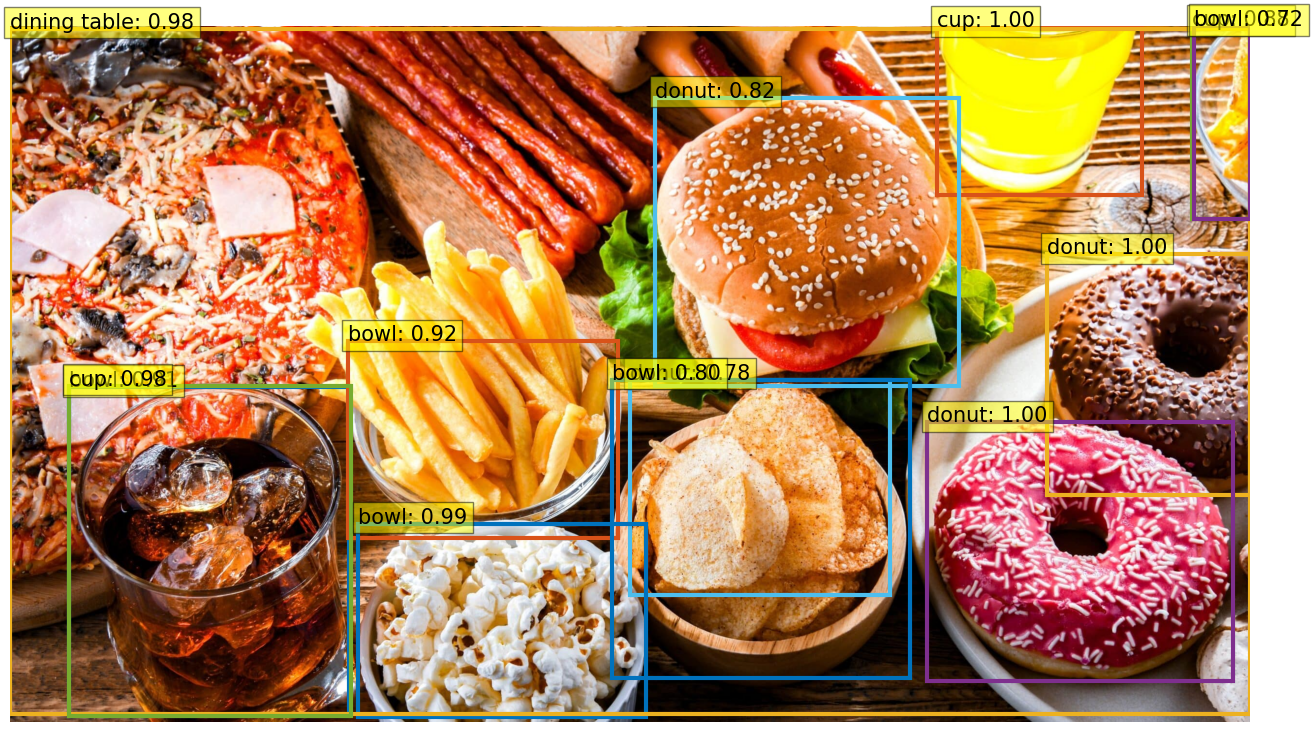

In [13]:
# plot image with objects detected
dv.plot_inference_objects(im, probability, boxes)